In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'master_sheet.xlsx'
happiness_file = pd.read_excel(file_path, sheet_name='PROCESSED_HAPPINESS')
income_file = pd.read_excel(file_path, sheet_name='PROCESSED_INCOME')

# Function to convert the row in .xlsx to a NumPy array
def convert(row_index, data):
    temp_row_series = data.iloc[row_index].iloc[2:]
    return temp_row_series


# All countries
Income vs happiness

In [2]:
countries = happiness_file.iloc[:, 0].to_numpy()
num_countries = len(countries)

happiness = []
income = []

for i in range(num_countries):
    happiness.append(convert(i,happiness_file).to_numpy())
    income.append(convert(i,income_file).to_numpy())


In [3]:
## Data processing to create line of best fit


def flatten_data(x,y):
    # Combines all the INCOME into one array and the HAPPINESS into another array
    x_combined = np.concatenate(x)
    y_combined  = np.concatenate(y)

    # Ensures all values are numeric by converting all to None to NaN
    x_combined = pd.to_numeric(x_combined, errors='coerce')
    y_combined = pd.to_numeric(y_combined , errors='coerce')

    # The mask will filter out all combos of INCOME and HAPPINESS (x,y) where at least one is NaN
    mask = ~np.isnan(x_combined) & ~np.isnan(y_combined) # Only returns true if both are numbers (due to & operator)
    return x_combined[mask], y_combined[mask]

# Flatten all data
INC_combined, HAP_combined = flatten_data(income, happiness)

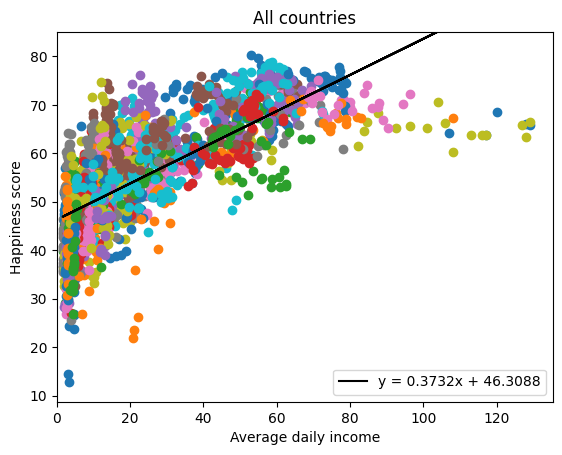

R-value: 0.7340419331121394


In [23]:
# Scatter the data points
not_efficient = ['Hong Kong, China','South Korea','Bahrain']
efficient = ['Nicaragua','Nepal','Kyrgyz Republic']

for i in range(num_countries):
    plt.scatter(income[i],happiness[i])


# Plot LOBF
slope1, intercept1 = np.polyfit(INC_combined, HAP_combined, 1)    # Calculates the slope and y int for LOBF
lobf1 = slope1 * INC_combined + intercept1                     # Plugging into y = mx + c!
lobf1_equation = f"y = {round(slope1,4)}x + {round(intercept1,4)}"
plt.plot(INC_combined, lobf1, c='black', label=lobf1_equation,zorder=50)

# Titling
plt.title('All countries')
plt.xlabel('Average daily income')
plt.ylabel('Happiness score')

# x and y limits for zooming in
plt.xlim(left=0)
plt.ylim(top=85)

# Show legend and graph
plt.legend()
plt.show()

# Show R-value
r_value = np.corrcoef(INC_combined, HAP_combined)[0, 1]     # Function in numpy that calculates the R-value
print("R-value:", r_value)

# Selected countries to confirm article's observation

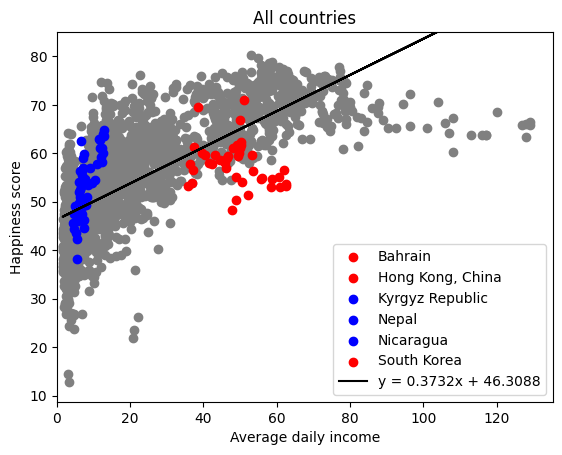

R-value: 0.7340419331121394


In [22]:
# Scatter the data points
not_efficient = ['Hong Kong, China','South Korea','Bahrain']
efficient = ['Nicaragua','Nepal','Kyrgyz Republic']

for i in range(num_countries):
    if countries[i] in not_efficient:
        plt.scatter(income[i],happiness[i],color='red',label=countries[i],zorder=50)
    elif countries[i] in efficient:
        plt.scatter(income[i],happiness[i],color='blue',label=countries[i],zorder=50)
    else:
        plt.scatter(income[i],happiness[i],color='grey')


# Plot LOBF
slope1, intercept1 = np.polyfit(INC_combined, HAP_combined, 1)    # Calculates the slope and y int for LOBF
lobf1 = slope1 * INC_combined + intercept1                     # Plugging into y = mx + c!
lobf1_equation = f"y = {round(slope1,4)}x + {round(intercept1,4)}"
plt.plot(INC_combined, lobf1, c='black', label=lobf1_equation,zorder=50)

# Titling
plt.title('All countries')
plt.xlabel('Average daily income')
plt.ylabel('Happiness score')

# x and y limits for zooming in
plt.xlim(left=0)
plt.ylim(top=85)

# Show legend and graph
plt.legend()
plt.show()

# Show R-value
r_value = np.corrcoef(INC_combined, HAP_combined)[0, 1]     # Function in numpy that calculates the R-value
print("R-value:", r_value)

# Lower income countries (0 - 25)

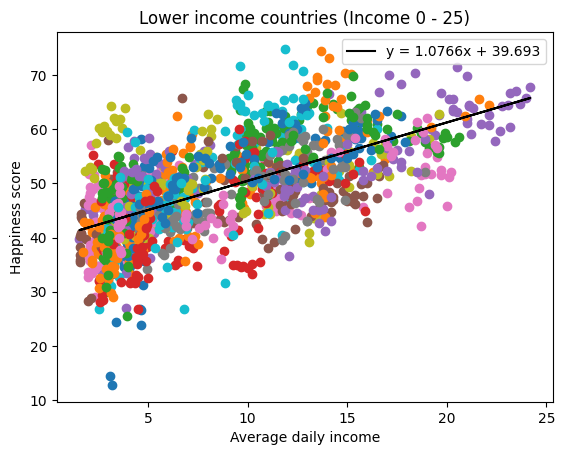

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Cuba', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Pakistan', 'Palestine', 'Paraguay', 'Peru', 'Philippines', 'Rwanda', 'Senegal', 'Serbia', 'Sierra Leone', 'Somalia'

In [5]:
low_INC_countries = []
low_INC = []
low_INC_HAP = []

# Filter INCOMES from 0 - 40 and get corresponding HAPPINESS
for i in range(num_countries):
    if max(income[i])<25:
        plt.scatter(income[i],happiness[i])
        low_INC.append(income[i])
        low_INC_HAP.append(happiness[i])
        low_INC_countries.append(countries[i])

# Flatten data for this range
low_INC_combined, low_INC_HAP_combined = flatten_data(low_INC, low_INC_HAP)

# Plot LOBF
slope2, intercept2 = np.polyfit(low_INC_combined, low_INC_HAP_combined, 1)    
lobf2 = slope2 * low_INC_combined + intercept2
lobf2_equation = f"y = {round(slope2,4)}x + {round(intercept2,4)}"
plt.plot(low_INC_combined, lobf2, c='black', label=lobf2_equation)

# Titling
plt.title('Lower income countries (Income 0 - 25)')
plt.xlabel('Average daily income')
plt.ylabel('Happiness score')

# Show legend and graph
plt.legend()
plt.show()

# Show list of countries in this range and R-value
print(low_INC_countries)
print(len(low_INC_countries))
r_value = np.corrcoef(low_INC_combined, low_INC_HAP_combined)[0, 1]     # Function in numpy that calculates the R-value
print("R-value:", r_value)

# Higher income countries (55+)

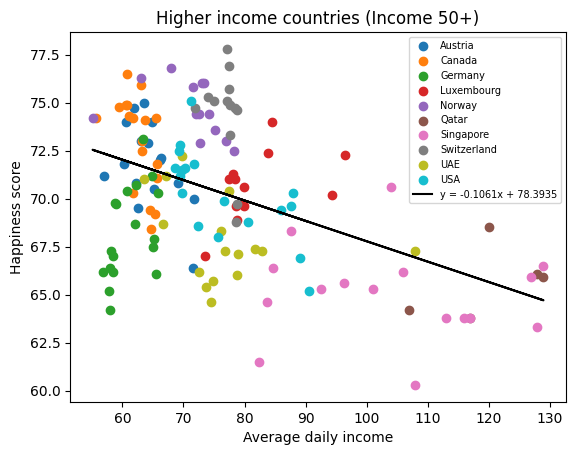

['Austria', 'Canada', 'Germany', 'Luxembourg', 'Norway', 'Qatar', 'Singapore', 'Switzerland', 'UAE', 'USA']
10
R-value: -0.4815355326510839


In [6]:
high_INC_countries = []
high_INC = []
high_INC_HAP = []

# Filter INCOMES 55+ and get corresponding HAPPINESS
for i in range(num_countries):
    if min(income[i])>55:
        plt.scatter(income[i],happiness[i],label=countries[i])
        high_INC.append(income[i])
        high_INC_HAP.append(happiness[i])
        high_INC_countries.append(countries[i])

# Flatten data for this range
high_INC_combined, high_INC_HAP_combined = flatten_data(high_INC, high_INC_HAP)

# Plot LOBF
slope4, intercept4 = np.polyfit(high_INC_combined, high_INC_HAP_combined, 1)    
lobf4 = slope4 * high_INC_combined + intercept4
lobf4_equation = f"y = {round(slope4,4)}x + {round(intercept4,4)}"
plt.plot(high_INC_combined, lobf4, c='black', label=lobf4_equation)

# Titling
plt.title('Higher income countries (Income 50+)')
plt.xlabel('Average daily income')
plt.ylabel('Happiness score')

# Show legend and graph
plt.legend(fontsize=7)
plt.show()

# Show list of countries in this range and R-value
print(high_INC_countries)
print(len(high_INC_countries))
r_value = np.corrcoef(high_INC_combined, high_INC_HAP_combined)[0, 1]     # Function in numpy that calculates the R-value
print("R-value:", r_value)

# Middle income countries (25 - 50)

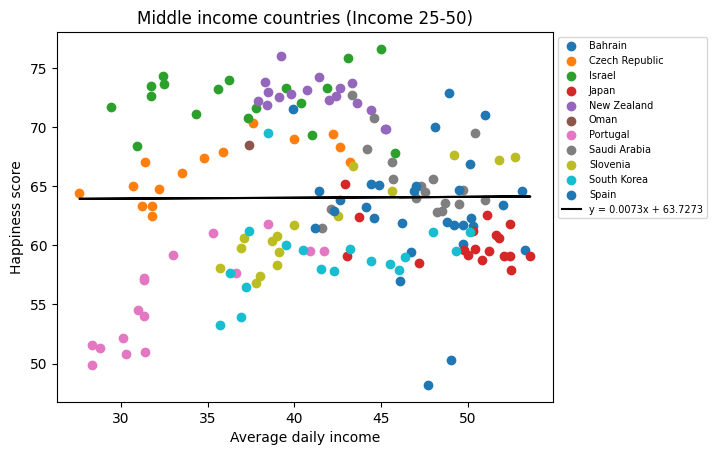

['Bahrain', 'Czech Republic', 'Israel', 'Japan', 'New Zealand', 'Oman', 'Portugal', 'Saudi Arabia', 'Slovenia', 'South Korea', 'Spain']
11
R-value: 0.007889319617991577


In [7]:
grad0_INC_countries = []
grad0_INC = []
grad0_INC_HAP = []

# Filter INCOMES 50+ and get corresponding HAPPINESS
for i in range(num_countries):
    if min(income[i])>=25 and max(income[i])<=55:
        plt.scatter(income[i],happiness[i],label=countries[i])
        grad0_INC.append(income[i])
        grad0_INC_HAP.append(happiness[i])
        grad0_INC_countries.append(countries[i])

# Flatten data for this range
grad0_INC_combined, grad0_INC_HAP_combined = flatten_data(grad0_INC, grad0_INC_HAP)

# Plot LOBF
slope3, intercept3 = np.polyfit(grad0_INC_combined, grad0_INC_HAP_combined, 1)    
lobf3 = slope3 * grad0_INC_combined + intercept3
lobf3_equation = f"y = {round(slope3,4)}x + {round(intercept3,4)}"
plt.plot(grad0_INC_combined, lobf3, c='black', label=lobf3_equation)

# Titling
plt.title('Middle income countries (Income 25-50)')
plt.xlabel('Average daily income')
plt.ylabel('Happiness score')

# Show legend and graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=7)
plt.show()

# Show list of countries in this range and R-value
print(grad0_INC_countries)
print(len(grad0_INC_countries))
r_value = np.corrcoef(grad0_INC_combined, grad0_INC_HAP_combined)[0, 1]     # Function in numpy that calculates the R-value
print("R-value:", r_value)